In [1]:
library(repr) ; options(repr.plot.res = 100, repr.plot.width=5, repr.plot.height= 5) # Change plot sizes (in cm) - this bit of code is only relevant if you are using a jupyter notebook - ignore otherwise

# Linear Models: Multiple variables with interactions

```{admonition} Learning goals
**By the end of this chapter you should be able to:**
- Understand what statistical interactions represent biologically (non-additive effects)
- Specify and fit interaction terms in R using `*` and `:` syntax
- Interpret interaction coefficients correctly and avoid common misinterpretations
- Visualise interactions effectively using interaction plots and marginal effects plots
- Fit and interpret ANCOVA models (continuous × categorical interactions)
- Test whether interactions are statistically supported and communicate findings clearly
```

```{admonition} Prerequisites
:class: tip
**Before starting this chapter, you should:**
- Have covered multiple explanatory variables chapter ([Multiple variables](mul-expl)) — main effects, confounding, model comparison
- Be comfortable interpreting model coefficients and using R formulas
- Have the ability to create grouped/faceted plots in `ggplot2`
```

## Introduction 

Here you will build on your skills in fitting linear models with multiple explanatory variables to data. You will learn about another commonly used Linear Model fitting technique: ANCOVA.

We will build two models in this chapter:

* **Model 1**: Is mammalian genome size predicted by interactions between trophic level and whether species are ground dwelling?

* **ANCOVA**: Is body size in Odonata predicted by interactions between genome size and taxonomic suborder?

So far, we have only looked at the independent effects of variables. For example, in the trophic level and ground dwelling model from [the first multiple explanatory variables chapter](mul-expl.ipynb), we only looked for specific differences for being a omnivore *or* being ground dwelling, not for being
specifically a *ground dwelling omnivore*. These independent effects of a variable are known as *main effects* and the effects of combinations of variables acting together are known as *interactions* — they describe how the variables *interact*.

### Chapter aims

The aims of this chapter are[^fn1-c2]:

* Creating more complex Linear Models with multiple explanatory variables

* Including the effects of interactions between multiple variables in a linear model

* Plotting predictions from more complex (multiple explanatory variables) linear models


### Formulae with interactions in R

We've already seen a number of different model formulae in R. They all use this syntax:

`response variable ~ explanatory variable(s)`

But we are now going to see two extra pieces of syntax:

* `y ~ a + b + a:b`: The `a:b` means the interaction between `a` and `b` — do combinations of these variables lead to different outcomes?

* `y ~ a * b`:  This a shorthand for the model above. The means fit `a` and `b` as main effects and their interaction `a:b`. 

## Model 1: Mammalian genome size

$\star$ Make sure you have changed the working directory to `Code` in your stats coursework directory.

$\star$ Create a new blank script called 'interactions.R' and add some introductory comments.

$\star$ Load the data:

[^fn1-c2]: (See footnote definition below.)


In [2]:
load('../data/mammals.rdata')

If `mammals.rdata` is missing, just import the data again using `read.csv`. You will then have to add the log C Value column to the imported data frame again.

Let's refit the model from [the first multiple explanatory variables chapter](mul-expl.ipynb), but including the interaction between trophic level and ground dwelling. We'll immediately check the model is appropriate:

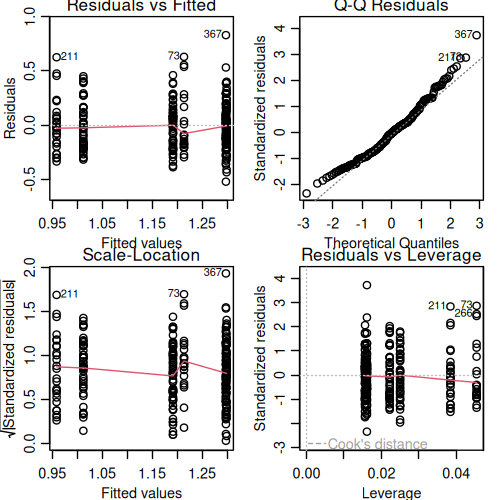

In [3]:
model <- lm(logCvalue ~ TrophicLevel * GroundDwelling, data= mammals)
par(mfrow=c(2,2), mar=c(3,3,1,1), mgp=c(2, 0.8,0))
plot(model)

Now, examine the `anova` and `summary` outputs for the model:

In [4]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8141063,0.40705316,8.061439,4.036387e-04
GroundDwelling,1,2.7469218,2.74692183,54.401106,2.335706e-12
TrophicLevel:GroundDwelling,2,0.4312875,0.21564376,4.270693,1.499280e-02
Residuals,253,12.7749466,0.05049386,NA,NA


Compared to the model from [the first multiple explanatory variables chapter](mul-expl.ipynb), there is an extra line at the bottom. The top two are the same and show that trophic level and ground dwelling both have independent main effects. The extra line
shows that there is also an interaction between the two. It doesn't explain a huge amount of variation, about half as much as trophic level, but it is significant.

Again, we can calculate the $r^2$ for the model: 

$\frac{0.81 + 2.75 + 0.43}{0.81+2.75+0.43+12.77} = 0.238$ 

The model from [the first multiple explanatory variables chapter](mul-expl.ipynb) without the interaction had an $r^2 = 0.212$ — our new
model explains 2.6% more of the variation in the data.

The summary table is as follows:

In [5]:
summary(model)


Call:
lm(formula = logCvalue ~ TrophicLevel * GroundDwelling, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52294 -0.17069 -0.01003  0.11920  0.83057 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              0.95895    0.04407  21.760  < 2e-16
TrophicLevelHerbivore                    0.05351    0.05535   0.967 0.334605
TrophicLevelOmnivore                     0.23281    0.05226   4.455 1.26e-05
GroundDwellingYes                        0.25487    0.06509   3.915 0.000116
TrophicLevelHerbivore:GroundDwellingYes  0.03033    0.07857   0.386 0.699791
TrophicLevelOmnivore:GroundDwellingYes  -0.14761    0.07930  -1.861 0.063839
                                           
(Intercept)                             ***
TrophicLevelHerbivore                      
TrophicLevelOmnivore                    ***
GroundDwellingYes                       ***
TrophicLevelHerbivore:GroundDwellingYes    

The lines in this output are:

1. The reference level (intercept) for non ground dwelling carnivores. The reference level is decided just by the alphabetic order of the levels. This also includes the `TrophicLevelCarnivore:GroundDwellingNo` interaction effect (more on this below).
2. Two differences for being in different trophic levels.
3. One difference for being ground dwelling
4. Two new differences that give specific differences for ground dwelling herbivores and omnivores (the interaction effects).

The first four lines, as in the model from the [anova chapter](anova.ipynb), allow us to find the predicted values for each group *if the size of the differences did not vary between levels because of the interaction effects*. That is, this part of the model only includes a single difference, between ground and non-ground species, which has to be the same for each trophic group because it ignores interactions between trophic level and ground / non-ground-dwelling identity of each species. The last two lines then give the estimated coefficients associated with the interaction terms, and allow cause the size of differences to vary between levels because of the further effects of interactions.

The table below show how the fitted coefficients in the summary output above combine to give the predictions for each group combination, with those two new lines show in red:

| |**Not ground** |  **Ground** |
|:- |:- |:-|
|**Carnivore** | 0.96 = 0.96 |  0.96 + 0.25 = 1.21 |
|**Herbivore** | 0.96 + 0.05 = 1.01 | 0.96 + 0.05 + 0.25<span style="color:red"> + 0.03</span> = 1.29|
|**Omnivore** | 0.96 + 0.23 = 1.19 | 0.96 + 0.23 + 0.25<span style="color:red"> - 0.15</span> = 1.29|

So why are there only two new coefficients? What about the coefficient corresponding to the `TrophicLevelCarnivore:GroundDwellingNo` interaction effect? For interactions between two factors, there are always $(n-1)\times(m-1)$ new coefficients, where $n$ and $m$ are the number of levels in the two factors (Ground dwelling or not has 2 levels and trophic level has 3 levels, in our current example). So in this model, $(3-1) \times (2-1) = 2$. It might be easier to understand why graphically: 

![image](./graphics/interactionsdiag.png)

The prediction for the white boxes above can be found by adding the main effects together but for the grey boxes, we need to find specific differences. So there are $(n-1)\times(m-1)$ interaction coefficients (count the number of grey boxes) to add.

If we put this together, what is the model telling us?

* Herbivores have the same genome sizes as carnivores, but omnivores have larger genomes.

* Ground dwelling mammals have larger genomes.

These two findings suggest that ground dwelling omnivores should have extra big genomes. However, the interaction shows they are smaller than expected and are, in fact, similar to ground dwelling herbivores.

Note that although the interaction term in the `anova` output is significant, neither of the two coefficients in the `summary` has a $p<0.05$. There are two weak differences (one
very weak, one nearly significant) that together explain significant
variance in the data.

$\star$ Copy the code above into your script and run the model.

Make sure you understand the output!

Just to make sure the sums above are correct, we'll use the same code as
in [the first multiple explanatory variables chapter](mul-expl.ipynb) to get r to calculate predictions for us, similar to the way we did [before](mul-expl.ipynb):

In [6]:
# a data frame of combinations of variables
gd <- rep(levels(mammals$GroundDwelling), times = 3)
print(gd)

[1] "No"  "Yes" "No"  "Yes" "No"  "Yes"


In [7]:
tl <- rep(levels(mammals$TrophicLevel), each = 2)
print(tl)

[1] "Carnivore" "Carnivore" "Herbivore" "Herbivore" "Omnivore"  "Omnivore" 


Again, remember that the `each = 2` option repeats each value twice in succession; the `times = 3` options repeats the whole set of values (the whole vector) three times.

In [8]:
# New data frame
predVals <- data.frame(GroundDwelling = gd, TrophicLevel = tl)

# predict using the new data frame
predVals$predict <- predict(model, newdata = predVals)
print(predVals)

  GroundDwelling TrophicLevel   predict
1             No    Carnivore 0.9589465
2            Yes    Carnivore 1.2138170
3             No    Herbivore 1.0124594
4            Yes    Herbivore 1.2976624
5             No     Omnivore 1.1917603
6            Yes     Omnivore 1.2990165


$\star$ Include and run the code for gererating these predictions in your script.

If we plot these data points onto the barplot from [the first multiple explanatory variables chapter](mul-expl.ipynb), they now lie exactly on the mean values, because we've allowed for interactions. The triangle on this plot shows the predictions for ground dwelling omnivores from the main effects ($0.96 + 0.23  + 0.25 = 1.44$), the interaction of $-0.15$ pushes the prediction back down.

![image](./graphics/predPlot.svg)



## Model 2 (ANCOVA): Body Weight in Odonata

We'll go all the way back to the regression analyses from the [regression chapter](regress.ipynb). remember that we fitted two separate regression lines to the data for damselflies and dragonflies. We'll now use an interaction to fit these in a single model. This kind of linear model — with a mixture of continuous variables and factors — is often called an *analysis of covariance*, or ANCOVA. That is, ANCOVA is a type of linear model that blends anova and regression. ANCOVA evaluates whether population means of a dependent variable are equal across levels of a categorical independent variable, while statistically controlling for the effects of other continuous variables that are not of primary interest, known as covariates.

*Thus, ANCOVA is a linear model with one categorical and one or more continuous predictors*.

We will use the odonates data that we have worked with [before](exp-design.ipynb).

$\star$ First load the data:

In [9]:
odonata <- read.csv('../data/genome_size.csv', stringsAsFactors = T)
odonata$genome_size <- as.numeric(as.character(odonata$GenomeSize))


$\star$ Now create two new variables in the `odonata` data set called `logGS` and `logBW` containing log genome size and log body weight:

In [10]:
odonata$logGS <- log(odonata$genome_size)
odonata$logBW <- log(odonata$BodyWeight)

The models we fitted [before](exp-design.ipynb) looked like this:

![image](./graphics/dragonData.svg)

We can now fit the model of body weight as a function of both genome size and suborder:

In [11]:
odonModel <- lm(logBW ~ logGS * Suborder, data = odonata)

In [12]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = odonata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


Again, we'll look at the <span>anova</span> table first:

In [13]:
anova(odonModel)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logGS,1,1.144458,1.1444583,2.710007,1.030601e-01
Suborder,1,111.967748,111.9677481,265.132794,4.154783e-29
logGS:Suborder,1,9.144522,9.1445216,21.653669,1.068365e-05
Residuals,94,39.696969,0.4223082,NA,NA


Interpreting this:

* There is no significant main effect of log genome size. The *main* effect is the important thing here — genome size is hugely important but does very different things for the two different suborders. If we ignored `Suborder`, there isn't an overall relationship: the average of those two lines is pretty much flat.

* There is a very strong main effect of Suborder: the mean body weight in the two groups are very different.

* There is a strong interaction between suborder and genome size. This is an interaction between a factor and a continuous variable and shows that the *slopes* are different for the different factor levels.

Now for the summary table:

In [14]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = odonata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


* The first thing to note is that the $r^2$ value is really high. The model explains three quarters (0.752) of the variation in the data.

* Next, there are four coefficients:

    * The intercept is for the first level of `Suborder`, which is Anisoptera (dragonflies).
    * The next line, for `log genome size`, is the slope for Anisoptera. 
    * We then have a coefficient for the second level of `Suborder`, which is Zygoptera (damselflies). As with the first model, this difference in factor levels is a difference in mean values and shows the difference in the intercept for Zygoptera.
    * The last line is the interaction between `Suborder` and `logGS`. This shows how the slope for Zygoptera differs from the slope for Anisoptera.

How do these hang together to give the two lines shown in the model? We can calculate these by hand: 

\begin{align*}
 \textrm{Body Weight} &= -2.40 + 1.01 \times \textrm{logGS} & \textrm{[Anisoptera]}\\
 \textrm{Body Weight} &= (-2.40 -2.25) + (1.01 - 2.15) \times \textrm{logGS} & \textrm{[Zygoptera]}\\
        &= -4.65 - 1.14 \times \textrm{logGS}
\end{align*}

$\star$ Add the above code into your script and check that you understand the outputs.

We'll use the `predict` function again to get the predicted values from the model and add lines to the plot above.

First, we'll create a set of numbers spanning the range of genome size:

In [15]:
#get the range of the data:
rng <- range(odonata$logGS)
#get a sequence from the min to the max with 100 equally spaced values:
LogGSForFitting <- seq(rng[1], rng[2], length = 100)

Have a look at these numbers:

In [16]:
print(LogGSForFitting)

  [1] -0.891598119 -0.873918728 -0.856239337 -0.838559945 -0.820880554
  [6] -0.803201163 -0.785521772 -0.767842380 -0.750162989 -0.732483598
 [11] -0.714804206 -0.697124815 -0.679445424 -0.661766032 -0.644086641
 [16] -0.626407250 -0.608727859 -0.591048467 -0.573369076 -0.555689685
 [21] -0.538010293 -0.520330902 -0.502651511 -0.484972119 -0.467292728
 [26] -0.449613337 -0.431933946 -0.414254554 -0.396575163 -0.378895772
 [31] -0.361216380 -0.343536989 -0.325857598 -0.308178207 -0.290498815
 [36] -0.272819424 -0.255140033 -0.237460641 -0.219781250 -0.202101859
 [41] -0.184422467 -0.166743076 -0.149063685 -0.131384294 -0.113704902
 [46] -0.096025511 -0.078346120 -0.060666728 -0.042987337 -0.025307946
 [51] -0.007628554  0.010050837  0.027730228  0.045409619  0.063089011
 [56]  0.080768402  0.098447793  0.116127185  0.133806576  0.151485967
 [61]  0.169165358  0.186844750  0.204524141  0.222203532  0.239882924
 [66]  0.257562315  0.275241706  0.292921098  0.310600489  0.328279880
 [71] 

We can now use the model to predict the values of body weight at each of those points for each of the two suborders:

In [17]:
#get a data frame of new data for the order
ZygoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Zygoptera")

#get the predictions and standard error
ZygoPred <- predict(odonModel, newdata = ZygoVals, se.fit = TRUE)

#repeat for anisoptera
AnisoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Anisoptera")
AnisoPred <- predict(odonModel, newdata = AnisoVals, se.fit = TRUE)

We've added `se.fit=TRUE` to the function to get the standard error around the regression lines. Both `AnisoPred` and `ZygoPred` contain predicted values (called `fit`) and standard error values (called `se.fit`) for each of the values in our generated values in `LogGSForFitting` for each of the two suborders.

We can add the predictions onto a plot like this:

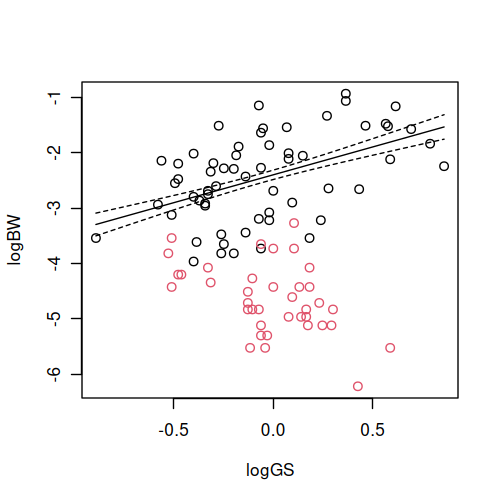

In [18]:
# plot the scatterplot of the data
plot(logBW ~ logGS, data = odonata, col = Suborder)
# add the predicted lines
lines(AnisoPred$fit ~ LogGSForFitting, col = "black")
lines(AnisoPred$fit + AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)
lines(AnisoPred$fit - AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)

$\star$ Copy the prediction code into your script and run the plot above.

Copy and modify the last three lines to add the lines for the Zygoptera. Your final plot should look like this:

![image](./graphics/odonPlot.svg)


[^fn1-c35]: Here you work with the script file `mul_expl_inter.R`


